# Evolución estelar y el diagrama H-R

El siguiente Notebook es una demostración corta de cómo tomar datos astrómetricos para visualizar evolución estelar mediante el diagrama Hertzsprung-Russell.

Estaremos utilizando datos del catálogo Hipparcos, que contiene datos astrométricos, mediciones precisas de objetos celestes,  y datos fotométricos.

Los datos para este ejercicio se encuentran en el repositorio en forma de un archivo CSV.

## Diagrama Hertzsprung/Russel

En el diagrama Hertzprung-Russell las temperaturas de las estrellas son graficadas con sus luminosidades.

Es un diagrama, en el cual se ubican en un eje el tipo espectral de la estrellas (que se relacionan con la temperatura efectiva de sus superficies) y en el otro la luminosidad. Ubicando las estrellas de acuerdo a este par de coordenadas, se observa que se agrupan en distintas zonas específicas, relacionadas con la etapa evolutiva en la que se encuentran.

Las estrellas que queman hidrógeno en helio se encuentran en la diagonal central del diagrama, llamadas estrellas de secuencia principal. Las enanas rojas se encuentran en la esquina inferior derecha. Una vez que una estrella sale de su secuencia principal se convierte en una gigante roja o una supergigante, dependiendo de su masa. Las estrellas con masas similares al Sol se convierten en enanas blancas.

<img src="https://cdn.eso.org/images/screen/eso0728c.jpg" width="500">

## ¿Cómo cambian las estrellas a través de su vida? ¿Cómo determinamos los ciclos de vida de las estrellas?

- Las estrellas viven por millones de años.
- Estrellas como nuestro Sol viven por aprox. 10 mil millones de años.
- Si juntamos suficientes observaciones de estrellas, podemos verlas en diferentes etapas de su desarrollo. Como nacen, como viven, como mueren.

<img src="http://biology-forums.com/gallery/18099_12_09_14_9_26_57.jpeg" width="600">

## Hipparcos

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/7/78/Hipparcos-testing-estec.jpg/300px-Hipparcos-testing-estec.jpg" width="400">

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [27]:
# Lea el archivo "hipparcos.csv

data = pd.read_csv('hipparcos.csv')
pd.set_option("display.max.columns", None)
data.head()

,Catalog,HIP,Proxy,RAhms,DEdms,Vmag,VarFlag,r_Vmag,RAdeg,DEdeg,AstroRef,Plx,pmRA,pmDE,e_RAdeg,e_DEdeg,e_Plx,e_pmRA,e_pmDE,DE:RA,Plx:RA,Plx:DE,pmRA:RA,pmRA:DE,pmRA:Plx,pmDE:RA,pmDE:DE,pmDE:Plx,pmDE:pmRA,F1,F2,---,BTmag,e_BTmag,VTmag,e_VTmag,m_BTmag,B-V,e_B-V,r_B-V,V-I,e_V-I,r_V-I,CombMag,Hpmag,e_Hpmag,Hpscat,o_Hpmag,m_Hpmag,Hpmax,HPmin,Period,HvarType,moreVar,morePhoto,CCDM,n_CCDM,Nsys,Ncomp,MultFlag,Source,Qual,m_HIP,theta,rho,e_rho,dHp,e_dHp,Survey,Chart,Notes,HD,BD,CoD,CPD,(V-I)red,SpType,r_SpType
0,H,1,NaN,00 00 00.22,+01 05 20.4,9.10,NaN,H,0.000912,1.089013,NaN,3.54,-5.20,-1.88,1.32,0.74,1.39,1.36,0.81,0.32,-0.07,-0.11,-0.24,0.09,-0.01,0.10,-0.01,0.01,0.34,0.0,0.74,1,9.643,0.020,9.130,0.019,NaN,0.482,0.025,T,0.55,0.03,L,NaN,9.2043,0.0020,0.017,87.0,NaN,9.17,9.24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S,NaN,NaN,224700.0,B+00 5077,NaN,NaN,0.66,F5,S
1,H,2,NaN,00 00 00.91,-19 29 55.8,9.27,NaN,G,0.003797,-19.498837,+,21.90,181.21,-0.93,1.28,0.70,3.10,1.74,0.92,0.12,-0.14,-0.24,-0.29,0.01,0.21,-0.02,-0.19,-0.28,0.14,2.0,1.45,2,10.519,0.033,9.378,0.021,NaN,0.999,0.002,G,1.04,0.00,I,NaN,9.4017,0.0017,0.015,120.0,NaN,9.37,9.44,NaN,C,NaN,NaN,NaN,NaN,NaN,1.0,O,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,224690.0,B-20 6688,NaN,NaN,1.04,K3V,4
2,H,3,NaN,00 00 01.20,+38 51 33.4,6.61,NaN,G,0.005008,38.859286,NaN,2.81,5.24,-2.91,0.53,0.40,0.63,0.57,0.47,0.06,0.09,0.04,0.43,-0.01,-0.06,0.03,0.24,0.07,0.21,0.0,-0.45,3,6.576,0.004,6.621,0.005,NaN,-0.019,0.004,G,0.00,0.00,H,NaN,6.6081,0.0007,0.008,127.0,NaN,6.60,6.62,NaN,C,NaN,NaN,00000+3852,I,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S,NaN,NaN,224699.0,B+38 5108,NaN,NaN,0.00,B9,S
3,H,4,NaN,00 00 02.01,-51 53 36.8,8.06,NaN,H,0.008382,-51.893546,NaN,7.75,62.85,0.16,0.53,0.59,0.97,0.65,0.65,-0.22,-0.09,-0.03,0.24,0.20,0.08,0.18,0.08,-0.31,-0.18,0.0,-1.46,4,8.471,0.007,8.092,0.007,NaN,0.370,0.009,T,0.43,0.01,L,NaN,8.1498,0.0011,0.015,201.0,NaN,8.12,8.18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S,NaN,NaN,224707.0,NaN,NaN,P-52 12237,0.43,F0V,2
4,H,5,NaN,00 00 02.39,-40 35 28.4,8.55,NaN,H,0.009965,-40.591224,NaN,2.87,2.53,9.07,0.64,0.61,1.11,0.67,0.74,0.10,0.24,0.06,0.26,-0.10,0.20,-0.16,-0.30,-0.19,0.06,0.0,-1.24,5,9.693,0.014,8.656,0.010,NaN,0.902,0.013,T,0.90,0.01,L,NaN,8.7077,0.0018,0.019,161.0,NaN,8.68,8.74,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,224705.0,NaN,C-41 15372,P-41 9991,0.95,G8III,2


## ¿Qué significan estos datos? ¿Cuáles columnas nos interesan?

- Luminosidad: qué tan brillante se ve la estrella. No es lo mismo que el brillo real. Estrellas más lejanas se ven más tenues, a esto lo llamamos Magnitud aparente. Cuando decimos que una estrella tiene cierta magnitud, debemos especificar el color a la que esta magnitud se refiere, ejemplo: verde, rojo, ultravioleta, infrarrojo i, infrarrojo z.

- Paralaje trigonométrico: desviación angular de la posición aparente de un objeto.

- Índice de color B-V: el color de una estrella nos da información valiosa, la temperatura promedio. A medida que la temperatura de un objeto aumenta su longitud de onda se hace más corta. Resultado de restar la magnitud obtenida en banda B (azul) con Banda V (visual)

# Entendamos un poco nuestros datos

- Hipparcos utilizaba una técnica llamada paralaje, que es la desviación angular de la posición aparente de un objeto, dependiendo del punto de vista elegido.
- El paralaje es el ángulo formado por la dirección de dos líneas visuales relativas a un mismo objeto, desde dos puntos distintos

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/6/60/Parallax-es.svg/330px-Parallax-es.svg.png" width="300">

- La distancia entre los puntos de observación se llama línea de base o 'baseline'
- La distancia angular, dada en grados o radianes, se llama ángulo de paralaje. 
- La línea base determina cuál es el ángulo de paralaje más pequeño que podemos resolver. Líneas de base más grande pueden resolver ángulos más pequeños.
- Como las estrellas están tan alejadas necesitamos una línea de base muy grande para poder determinar sus ángulos de paralaje.
- Los ástronomos utilizan la órbita de la Tierra como línea de base para lograr suficiente resolución.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/0/04/ParsecDef.svg/360px-ParsecDef.svg.png" width="300">

- Incluso utilizando una línea de base tan grande los ángulos que se pueden medir son muy pequeños. Proxima Centauri, la estrella más cercana, tiene un ángulo de paralaje de 0.772 arcosegundos.
- Cada grado se divide en 60 arco minutos, y cada arco minuto en 60 arco segundos. Quiere decir que 1 arco segundo es igual a 1/3600 grados.
- El ángulo de paralaje para nuestros datos está dado en unidades de mili arco segundos (x10-3).
- La distancia de la estrella está dada por la fórmula
    d = 1/p
Donde d es la disntacia a la estrella en parsecs (1 parsec = 3.26 años luz) y p es el ángulo de paralaje en arco segundos.

In [3]:
# Distancia en parsecs hacia Proxima Centauri
1/768.065e-3

1.3019731402941157

In [4]:
# Distancia en parsecs hacia Sirio
1/379.21e-3

2.637061258933045

- Un parsec (pc) es una unidad de longitud, significa 'parallax of one arc second', o paralaje de un segundo de arco.
- Es la distancia a la que 1 Unidad Astronómica (AU) subtiende un ángulo de segundo de arco. Es decir, una estrella tendra un pársec de distancia si su paralaje es igual a 1 segundo de arco entre el Sol y la Tierra.
- 1 pársec equivale a 3.2616 años luz (ly)

In [44]:
# Elegir solo algunas columnas
distancias = data.loc[:, ['HIP','RAhms', 'DEdms', 'Vmag', 'Plx', 'B-V', 'SpType']]
distancias

,HIP,RAhms,DEdms,Vmag,Plx,B-V,SpType
0,1,00 00 00.22,+01 05 20.4,9.10,3.54,0.482,F5
1,2,00 00 00.91,-19 29 55.8,9.27,21.90,0.999,K3V
2,3,00 00 01.20,+38 51 33.4,6.61,2.81,-0.019,B9
3,4,00 00 02.01,-51 53 36.8,8.06,7.75,0.370,F0V
4,5,00 00 02.39,-40 35 28.4,8.55,2.87,0.902,G8III
...,...,...,...,...,...,...,...
118213,118318,23 59 51.30,+11 40 25.4,6.99,1.92,1.595,K2
118214,118319,23 59 53.74,-22 25 41.4,8.23,10.63,0.639,G2V
118215,118320,23 59 54.25,+05 57 23.9,7.59,5.00,0.999,K0
118216,118321,23 59 54.78,-64 22 21.3,9.20,19.22,0.698,G5V


In [45]:
distancias.insert(loc=1, column='Distancia', value='')

In [46]:
distancias.dtypes

HIP            int64
Distancia     object
RAhms         object
DEdms         object
Vmag         float64
Plx          float64
B-V          float64
SpType        object
dtype: object

In [47]:
distancias.head()

,HIP,Distancia,RAhms,DEdms,Vmag,Plx,B-V,SpType
0,1,,00 00 00.22,+01 05 20.4,9.10,3.54,0.482,F5
1,2,,00 00 00.91,-19 29 55.8,9.27,21.90,0.999,K3V
2,3,,00 00 01.20,+38 51 33.4,6.61,2.81,-0.019,B9
3,4,,00 00 02.01,-51 53 36.8,8.06,7.75,0.370,F0V
4,5,,00 00 02.39,-40 35 28.4,8.55,2.87,0.902,G8III


In [48]:
distancias.dropna(inplace=True)
distancias.isna().sum()

HIP          0
Distancia    0
RAhms        0
DEdms        0
Vmag         0
Plx          0
B-V          0
SpType       0
dtype: int64

In [49]:
distancias['Distancia'] = (1/(distancias['Plx']*10**-3))

In [50]:
distancias

,HIP,Distancia,RAhms,DEdms,Vmag,Plx,B-V,SpType
0,1,282.485876,00 00 00.22,+01 05 20.4,9.10,3.54,0.482,F5
1,2,45.662100,00 00 00.91,-19 29 55.8,9.27,21.90,0.999,K3V
2,3,355.871886,00 00 01.20,+38 51 33.4,6.61,2.81,-0.019,B9
3,4,129.032258,00 00 02.01,-51 53 36.8,8.06,7.75,0.370,F0V
4,5,348.432056,00 00 02.39,-40 35 28.4,8.55,2.87,0.902,G8III
...,...,...,...,...,...,...,...,...
118213,118318,520.833333,23 59 51.30,+11 40 25.4,6.99,1.92,1.595,K2
118214,118319,94.073377,23 59 53.74,-22 25 41.4,8.23,10.63,0.639,G2V
118215,118320,200.000000,23 59 54.25,+05 57 23.9,7.59,5.00,0.999,K0
118216,118321,52.029136,23 59 54.78,-64 22 21.3,9.20,19.22,0.698,G5V


In [51]:
1/3.54e-3

282.4858757062147

In [52]:
distancias.isna().sum()

HIP          0
Distancia    0
RAhms        0
DEdms        0
Vmag         0
Plx          0
B-V          0
SpType       0
dtype: int64

In [53]:
distancias.columns.values

array(['HIP', 'Distancia', 'RAhms', 'DEdms', 'Vmag', 'Plx', 'B-V',
       'SpType'], dtype=object)

In [54]:
# Reordenar las columnas
distancias = distancias[['HIP','RAhms', 'DEdms', 'Vmag', 'Distancia', 'Plx', 'B-V', 'SpType']]
distancias.head()

,HIP,RAhms,DEdms,Vmag,Distancia,Plx,B-V,SpType
0,1,00 00 00.22,+01 05 20.4,9.10,282.485876,3.54,0.482,F5
1,2,00 00 00.91,-19 29 55.8,9.27,45.662100,21.90,0.999,K3V
2,3,00 00 01.20,+38 51 33.4,6.61,355.871886,2.81,-0.019,B9
3,4,00 00 02.01,-51 53 36.8,8.06,129.032258,7.75,0.370,F0V
4,5,00 00 02.39,-40 35 28.4,8.55,348.432056,2.87,0.902,G8III


# Magnitud Absoluta

- Utilizando la magnitud visual aparente, podemos encontrar la magnitud absoluta de estas estrellas.
- La magnitud aboluta está definida como la magnitud que una estrella aparecería si estuviera a 10 parsecs de nosotros.
- La magnitud absoluta del sol es de 4.84, su magnitud visible es de -26.2
- La magnitud absoluta está dada por la expresión:

    M = m -5 log d + 5
    
Donde m es la magnitud aparente, M es la magnitud absoluta y d es la distancia en parsecs
1. Calcule la magnitud absoluta de las estrellas en el DataFrame distancias, y agregue una nueva columna llamada 'MagAbs'

- Para utilizar 'log' en python, debe importarlo del paquete 'math' y llamarlo como math.log()

In [55]:
# Ejemplo de como importar math y llamar a math.log()
import math
import numpy

In [56]:
# Ejemplo de M para Vega
0.03 + 5 + (5 * (-0.88941))

0.5829500000000003

In [57]:
# Vega con paralaje
numpy.log10(130.23e-3)

-0.8852889594416377

In [58]:
# Vega con distancia en parsecs
numpy.log10(7.68)

0.885361220031512

In [59]:
# Ejemplo para Sirio
-1.44 - 5*numpy.log10(2.637) +5

1.4544493510328285

In [60]:
distancias.dtypes

HIP            int64
RAhms         object
DEdms         object
Vmag         float64
Distancia    float64
Plx          float64
B-V          float64
SpType        object
dtype: object

In [61]:
distancias['AbsMag'] = (distancias.Vmag - 5 * numpy.log10(distancias.Distancia) + 5)
distancias.head()

C:\Users\murip\anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
<ipython-input-61-a21e78829ecc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  distancias['AbsMag'] = (distancias.Vmag - 5 * numpy.log10(distancias.Distancia) + 5)


,HIP,RAhms,DEdms,Vmag,Distancia,Plx,B-V,SpType,AbsMag
0,1,00 00 00.22,+01 05 20.4,9.10,282.485876,3.54,0.482,F5,1.845016
1,2,00 00 00.91,-19 29 55.8,9.27,45.662100,21.90,0.999,K3V,5.972221
2,3,00 00 01.20,+38 51 33.4,6.61,355.871886,2.81,-0.019,B9,-1.146468
3,4,00 00 02.01,-51 53 36.8,8.06,129.032258,7.75,0.370,F0V,2.506509
4,5,00 00 02.39,-40 35 28.4,8.55,348.432056,2.87,0.902,G8III,0.839409


In [62]:
# Verifiquemos
9.10 - 5*numpy.log10(282.485876) +5

1.8450163078706066

In [63]:
9.27 - 5*numpy.log10(45.662100) +5

5.972220595915315

# Guardar datos

- Utilizando el DataFrame del ejercicio anterior, guarde el DataFrame en un .csv utilizando la función '.to_csv()'

In [64]:
distancias.to_csv('magnitudes.csv')

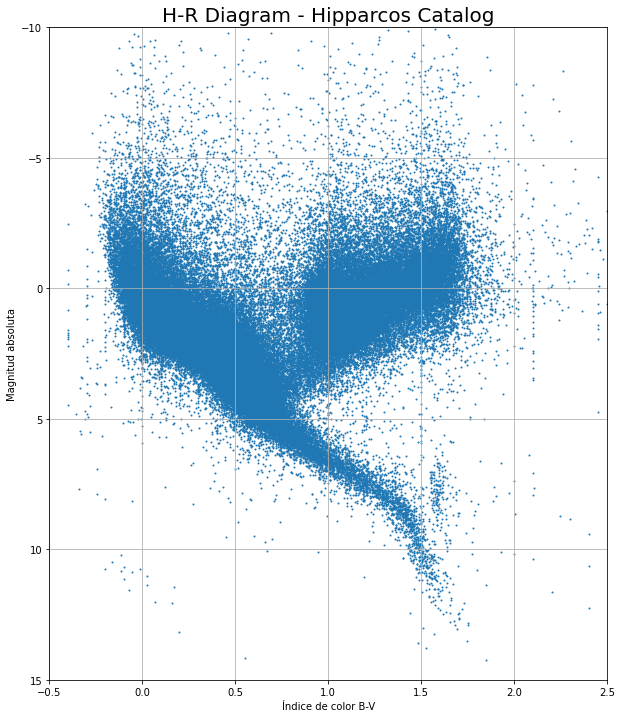

In [65]:
fig, ax = plt.subplots(figsize=(10,12))

ax.set_xlim(-0.5, 2.5)
ax.set_ylim(15, -10)
ax.grid()
ax.set_title('H-R Diagram - Hipparcos Catalog')

ax.title.set_fontsize(20)
ax.set_xlabel('Índice de color B-V')
ax.set_ylabel('Magnitud absoluta')
plt.scatter(distancias['B-V'], distancias['AbsMag'], s=1)

## Tipo espectral
- Para nuestra visualización solo necesitamos los dos primeros caracteres de la columna 'SpType'
- Guardamos solo aquellos valores en donde el primer caracter sea alfabético y el segundo un número.
- Creamos una nueva columna con los tipos espectrales.

In [66]:
f = lambda s: (len(s) >= 2)  and (s[0].isalpha()) and (s[1].isdigit())
i  = distancias['SpType'].apply(f)
distancias = distancias[i]

# A new column is created with the first two characters from 'SpType'
f = lambda s: s[0:2]
distancias['SpType2'] = distancias['SpType'].apply(f)

In [67]:
distancias.shape

(111562, 10)

In [68]:
distancias.head()

,HIP,RAhms,DEdms,Vmag,Distancia,Plx,B-V,SpType,AbsMag,SpType2
0,1,00 00 00.22,+01 05 20.4,9.10,282.485876,3.54,0.482,F5,1.845016,F5
1,2,00 00 00.91,-19 29 55.8,9.27,45.662100,21.90,0.999,K3V,5.972221,K3
2,3,00 00 01.20,+38 51 33.4,6.61,355.871886,2.81,-0.019,B9,-1.146468,B9
3,4,00 00 02.01,-51 53 36.8,8.06,129.032258,7.75,0.370,F0V,2.506509,F0
4,5,00 00 02.39,-40 35 28.4,8.55,348.432056,2.87,0.902,G8III,0.839409,G8


In [69]:
# Contemos la cantidad de estrellas en cadda clasificación espectral
f = lambda s: s[0]
clases = distancias['SpType'].map(f)
clases.value_counts()

K    31578
F    25201
G    22213
A    17651
B    10281
M     4212
O      256
C       82
N       48
R       23
S       17
Name: SpType, dtype: int64

In [70]:
# Quitemos las clases C, N, R, y S, para mantener solo las secuencias OBAFGKM del sistema Morgan-Keenan
f = lambda s: s[0] in 'OBAFGKM'
distancias = distancias[distancias['SpType'].map(f)]

In [72]:
# Contemos de nuevo y comparemos
f = lambda s: s[0]
clases = distancias['SpType'].map(f)
clases.value_counts()

K    31578
F    25201
G    22213
A    17651
B    10281
M     4212
O      256
Name: SpType, dtype: int64

In [73]:
# Ordenemos las clases espectrales siguiendo el sistema Morgan-Keenan OBAFGKM seguido de un número entre 0-9
orden = {'O':'0', 'B':'1', 'A':'2', 'F':'3', 'G':'4', 'K':'5', 'M':'6'}
f = lambda s: orden[s[0]]+s[1]
distancias['SpType2'] = distancias['SpType2'].apply(f)
distancias.head()

,HIP,RAhms,DEdms,Vmag,Distancia,Plx,B-V,SpType,AbsMag,SpType2
0,1,00 00 00.22,+01 05 20.4,9.10,282.485876,3.54,0.482,F5,1.845016,35
1,2,00 00 00.91,-19 29 55.8,9.27,45.662100,21.90,0.999,K3V,5.972221,53
2,3,00 00 01.20,+38 51 33.4,6.61,355.871886,2.81,-0.019,B9,-1.146468,19
3,4,00 00 02.01,-51 53 36.8,8.06,129.032258,7.75,0.370,F0V,2.506509,30
4,5,00 00 02.39,-40 35 28.4,8.55,348.432056,2.87,0.902,G8III,0.839409,48


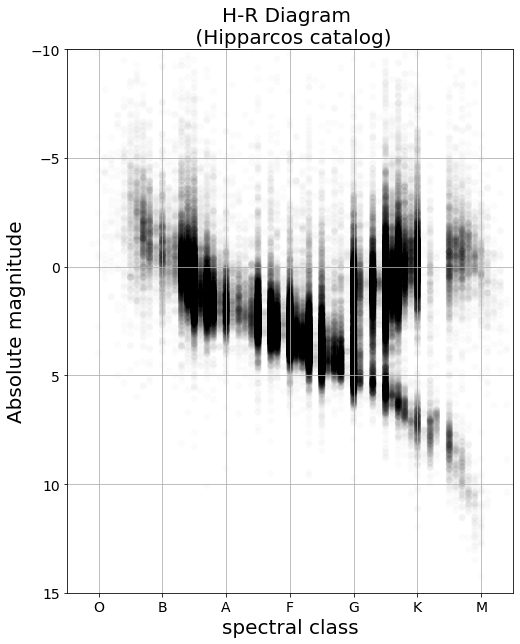

In [77]:
# Grafiquemos
fig, ax = plt.subplots(figsize=(8,10))

ax.set_xlim(0, 70)
ax.set_ylim(15, -10)
ax.grid()
ax.set_title('H-R Diagram \n (Hipparcos catalog)')

ax.title.set_fontsize(20)
ax.set_xlabel('spectral class')
ax.xaxis.label.set_fontsize(20)
ax.set_ylabel('Absolute magnitude')
ax.yaxis.label.set_fontsize(20)

ax.scatter(distancias['SpType2'].astype(np.int), distancias['AbsMag'],
           s=50, edgecolors='none', alpha=0.015, c='k')
ax.set_xticks(range(5,75,10))
ax.set_xticklabels(['O', 'B', 'A', 'F', 'G', 'K', 'M'])
ax.tick_params(axis='both', labelsize=14)

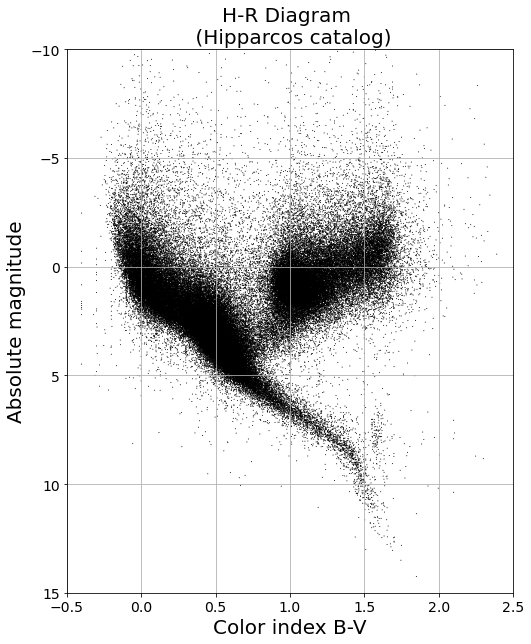

In [79]:
# Grafiquemos con nuestro indice de color B-V en lugar de las clases espectrales
fig, ax = plt.subplots(figsize=(8,10))

ax.set_xlim(-0.5, 2.5)
ax.set_ylim(15, -10)
ax.grid()
ax.set_title('H-R Diagram \n (Hipparcos catalog)')

ax.title.set_fontsize(20)
ax.set_xlabel('Color index B-V')
ax.xaxis.label.set_fontsize(20)
ax.set_ylabel('Absolute magnitude')
ax.yaxis.label.set_fontsize(20)

ax.scatter(distancias['B-V'], distancias['AbsMag'],
#           s=50, edgecolors='none', alpha=0.015, c='k')
           s=1, edgecolors='none', c='k')

ax.tick_params(axis='both', labelsize=14)

In [81]:
# Analicemos la cantidad de estrellas por clasificación estelar, de la columna 'SpType'
f = lambda s: 'VII' in s
b = distancias['SpType'].map(f)
print ("Class VII: white dwarfs, there are %d stars" %sum(b))

f = lambda s: ('VI' in s) and ('VII' not in s)
b = distancias['SpType'].map(f)
print ("Class VI: subdwarfs, there are %d stars" %sum(b))

f = lambda s: ('V' in s) and ('VI' not in s) and ('IV' not in s)
b = distancias['SpType'].map(f)
print ("Class V: main-sequence, there are %d stars" %sum(b))

f = lambda s: 'IV' in s
b = distancias['SpType'].map(f)
print ("Class IV: subgiants, there are %d stars" %sum(b))

f = lambda s: 'III' in s
b = distancias['SpType'].map(f)
print ("Class III: giants, there are %d stars" %sum(b))

f = lambda s: ('II' in s) and ('III' not in s) and ('VII' not in s)
b = distancias['SpType'].map(f)
print ("Class II:  bright giants, there are %d stars" %sum(b))

f = lambda s: ('I' in s) and ('II' not in s) and ('V' not in s)
b = distancias['SpType'].map(f)
print ("Class I: supergiants, there are %d stars" %sum(b))

Class VII: white dwarfs, there are 1 stars
Class VI: subdwarfs, there are 16 stars
Class V: main-sequence, there are 24683 stars
Class IV: subgiants, there are 7955 stars
Class III: giants, there are 22519 stars
Class II:  bright giants, there are 1239 stars
Class I: supergiants, there are 937 stars


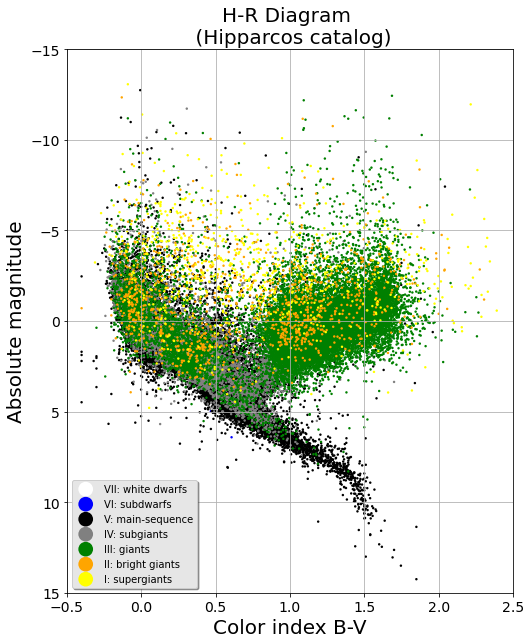

In [85]:
# Utilizando diferente color para cada clasificación estelar
def plot_lum_class(b,c, label):
    ''' b: boolean Series to make the selection
        c: Color
        label: for the legend
    '''
    x = distancias['B-V'][b]
    y = distancias['AbsMag'][b]
    ax.scatter(x, y, c = c, s=6, edgecolors='none', label = label)

fig = plt.figure(figsize=(8,10))
ax = fig.add_subplot(111)

ax.set_xlim(-0.5, 2.5)
ax.set_ylim(15, -15)
ax.grid()
ax.set_title('H-R Diagram \n (Hipparcos catalog)')

ax.title.set_fontsize(20)
ax.set_xlabel('Color index B-V')
ax.xaxis.label.set_fontsize(20)
ax.set_ylabel('Absolute magnitude')
ax.yaxis.label.set_fontsize(20)

f = lambda s: 'VII' in s
b = distancias['SpType'].map(f)
plot_lum_class(b,'white', 'VII: white dwarfs')

f = lambda s: ('VI' in s) and ('VII' not in s)
b = distancias['SpType'].map(f)
plot_lum_class(b,'blue', 'VI: subdwarfs')

f = lambda s: ('V' in s) and ('VI' not in s) and ('IV' not in s)
b = distancias['SpType'].map(f)
plot_lum_class(b,'black', 'V: main-sequence')

f = lambda s: 'IV' in s
b = distancias['SpType'].map(f)
plot_lum_class(b,'grey', 'IV: subgiants')

f = lambda s: 'III' in s
b = distancias['SpType'].map(f)
plot_lum_class(b,'green', 'III: giants')

f = lambda s: ('II' in s) and ('III' not in s) and ('VII' not in s)
b = distancias['SpType'].map(f)
plot_lum_class(b,'orange', 'II: bright giants')

f = lambda s: ('I' in s) and ('II' not in s) and ('V' not in s)
b = distancias['SpType'].map(f)
plot_lum_class(b,'yellow', 'I: supergiants')

ax.tick_params(axis='both', labelsize=14)
legend = ax.legend(scatterpoints=1,markerscale = 6, shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')